<a href="https://colab.research.google.com/github/vladtsyp/study_deeplearning/blob/main/task_1/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №1. Построение простой нейросети в среде Google Colaboratory на языке программирования Python. Обучение базовой модели.

##### **Задание 1.** Напишите функцию, которая присваивает w1 и w2 случайные веса.

In [ ]:
from random import randint

def get_random_weight():
  w1 = randint(0, 100)/100
  w2 = randint(0, 100)/100
  return (w1, w2)

w1, w2 = get_random_weight()
print(w1, w2)

0.43 0.8


##### **Задание 2.** Напишите функцию, которая делает проверку сразу всех примеров учебного набора с текущими весами.

In [ ]:
def predict(x_train, w):
  summator = x_train[0] * w[0] + x_train[1] * w[1]
  act = 1 if summator >= 1 else 0
  return act

##### **Задание 3.** Со случайными стартовыми весами обучить нейрон дельта методом для следующих операций:
> КОНЪЮНКЦИЯ, 
ДИЗЪЮНКЦИЯ,
XOR,
КОНЪЮНКЦИЯ ОТРИЦАНИЯ Х1 И Х2,
КОНЪЮНКЦИЯ Х1 И ОТРИЦАНИЯ Х2

Составить отчет по результатам: название операции, стартовые веса, точность модели на старте (сколько ошибок), скорость обучения, возможно ли обучить нейрон для получения 100%-ной точности, сколько эпох потребовалось, итоговые веса.
Для какой из приведенных логических операций не получится обучить нейрон и почему?

In [ ]:
from tabulate import tabulate

def train(x_train, y_train, w, speed, predict=predict):
  head = ['веса', 'ошибка', 'предсказание', 'истина']
  data = []
  for i in range(len(x_train)):
    error = y_train[i] - predict(x_train[i], w)
    data.append([[w[0], w[1]], error, predict(x_train[i], w), y_train[i]])
    # print(w, error)
    # корректировка ошибок
    if error != 0:
      w[0] = w[0] + error * x_train[i][0] * speed
      w[1] = w[1] + error * x_train[i][1] * speed
      data.append([[w[0], w[1]], '*', predict(x_train[i], w), y_train[i]])
      # print(w)
  print(tabulate(data, head, tablefmt="github")) # display table

x_test = [[0, 0], [0, 1], [1, 0], [1, 1]] # для тестирования предсказаний

###### КОНЪЮКЦИЯ

In [ ]:
w0 = list(get_random_weight())
x_train_and = [[0, 0], [0, 1], [1, 0], [1, 1]] # входные данные
y_train_and = [0, 0, 0, 1] # корректные значения
w0

[0.6, 0.25]

In [ ]:
train(x_train_and, y_train_and, w0, 0.3)

| веса                       |   ошибка |   предсказание |   истина |
|----------------------------|----------|----------------|----------|
| [0.8999999999999999, 0.55] |        0 |              0 |        0 |
| [0.8999999999999999, 0.55] |        0 |              0 |        0 |
| [0.8999999999999999, 0.55] |        0 |              0 |        0 |
| [0.8999999999999999, 0.55] |        0 |              1 |        1 |


In [ ]:
for x in x_test:
  print(x, predict(x, w0))

[0, 0] 0
[0, 1] 0
[1, 0] 0
[1, 1] 1


###### ДИЗЪЮНКЦИЯ

In [ ]:
w1 = list(get_random_weight())
x_train_or = [[0, 0], [0, 1], [1, 0], [1, 1]] # входные данные
y_train_or = [0, 1, 1, 1] # корректные значения
w1

[0.03, 0.33]

In [ ]:
train(x_train_or, y_train_or, w1, 0.3)

| веса         |   ошибка |   предсказание |   истина |
|--------------|----------|----------------|----------|
| [1.23, 1.23] |        0 |              0 |        0 |
| [1.23, 1.23] |        0 |              1 |        1 |
| [1.23, 1.23] |        0 |              1 |        1 |
| [1.23, 1.23] |        0 |              1 |        1 |


In [ ]:
for x in x_test:
  print(x, predict(x, w1))

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 1


###### XOR (не получится)

In [ ]:
w2 = list(get_random_weight())
x_train_xor = [[0, 0], [0, 1], [1, 0], [1, 1]] # входные данные
y_train_xor = [0, 1, 1, 0] # корректные значения
w2

[0.89, 0.33]

In [ ]:
train(x_train_xor, y_train_xor, w2, 0.1)

| веса                        | ошибка   |   предсказание |   истина |
|-----------------------------|----------|----------------|----------|
| [0.89, 0.33]                | 0        |              0 |        0 |
| [0.89, 0.33]                | 1        |              0 |        1 |
| [0.89, 0.43000000000000005] | *        |              0 |        1 |
| [0.89, 0.43000000000000005] | 1        |              0 |        1 |
| [0.99, 0.43000000000000005] | *        |              0 |        1 |
| [0.99, 0.43000000000000005] | -1       |              1 |        0 |
| [0.89, 0.33000000000000007] | *        |              1 |        0 |


###### КОНЪЮНКЦИЯ ОТРИЦАНИЯ Х1 И Х2

In [ ]:
w3 = list(get_random_weight())
x_train_K1 = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train_K1 = [0, 1, 0, 0]
w3

[0.69, 0.57]

In [ ]:
train(x_train_K1, y_train_K1, w3, 0.3)

| веса                         |   ошибка |   предсказание |   истина |
|------------------------------|----------|----------------|----------|
| [-0.21000000000000002, 1.17] |        0 |              0 |        0 |
| [-0.21000000000000002, 1.17] |        0 |              1 |        1 |
| [-0.21000000000000002, 1.17] |        0 |              0 |        0 |
| [-0.21000000000000002, 1.17] |        0 |              0 |        0 |


In [ ]:
for x in x_test:
  print(x, predict(x, w3))

[0, 0] 0
[0, 1] 1
[1, 0] 0
[1, 1] 0


###### КОНЪЮНКЦИЯ Х1 И ОТРИЦАНИЯ Х2

In [ ]:
w4 = list(get_random_weight())
x_train_K2 = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train_K2 = [0, 0, 1, 0]
w4

[0.09, 0.63]

In [ ]:
train(x_train_K2, y_train_K2, w4, 0.3)

| веса          |   ошибка |   предсказание |   истина |
|---------------|----------|----------------|----------|
| [1.29, -0.57] |        0 |              0 |        0 |
| [1.29, -0.57] |        0 |              0 |        0 |
| [1.29, -0.57] |        0 |              1 |        1 |
| [1.29, -0.57] |        0 |              0 |        0 |


In [ ]:
for x in x_test:
  print(x, predict(x, w4))

[0, 0] 0
[0, 1] 0
[1, 0] 1
[1, 1] 0


##### **Задание 4.** Изменить кодировку данных и функцию активации. Новые параметры: 1 - истина, -1 - ложь.
Функция активации: пороговая; если полученное значение больше 0, результат =1, иначе =-1.

Со случайными стартовыми весами обучить нейрон дельта методом для следующих операций:
КОНЪЮНКЦИЯ.

Возможно ли обучить нейрон с указанными параметрами дельта методом и какой коэффициент скорости обучения потребуется установить?
Возможно ли подобрать веса для данной операции без машинного обучения?

In [ ]:
def predict_t4(x_train, w):
  summator = x_train[0] * w[0] + x_train[1] * w[1]
  act = 1 if summator > 0 else -1
  return act

In [ ]:
w5 = list(get_random_weight())
x_train_and2 = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_train_and2 = [-1, -1, -1, 1]
w5

[0.09, 0.41]

In [ ]:
train(x_train_and2, y_train_and2, w5, 0.3, predict_t4)

| веса                        | ошибка   |   предсказание |   истина |
|-----------------------------|----------|----------------|----------|
| [0.09, 0.41]                | 0        |             -1 |       -1 |
| [0.09, 0.41]                | -2       |              1 |       -1 |
| [0.69, -0.19]               | *        |             -1 |       -1 |
| [0.69, -0.19]               | -2       |              1 |       -1 |
| [0.08999999999999997, 0.41] | *        |             -1 |       -1 |
| [0.08999999999999997, 0.41] | 0        |              1 |        1 |


##### **Задание 5.** Добавить еще один вход данных на нейрон (на дополнительный вход всегда приходит единица, это аналог нейрона смещения). 
Потребуется переписать все функции. Получится ли теперь дельта методом обучить нейрон с параметрами из задания 4?

In [ ]:
def get_random_weight_t5():
  w1 = randint(0, 100)/100
  w2 = randint(0, 100)/100
  w3 = randint(0, 100)/100
  return [w1, w2, w3]

def predict_t5(x_train, w):
  summator = x_train[0] * w[0] + x_train[1] * w[1] + x_train[2] * w[2]
  act = 1 if summator > 0 else -1
  return act

def train_t5(x_train, y_train, w, speed, predict=predict):
  head = ['веса', 'ошибка', 'предсказание', 'истина']
  data = []
  for i in range(len(x_train)):
    error = y_train[i] - predict(x_train[i], w)
    data.append([[w[0], w[1], w[2]], error, predict(x_train[i], w), y_train[i]])
    # print(w, error)
    # корректировка ошибок
    if error != 0:
      w[0] = w[0] + error * x_train[i][0] * speed
      w[1] = w[1] + error * x_train[i][1] * speed
      w[2] = w[2] + error * x_train[i][2] * speed
      data.append([[w[0], w[1], w[2]], '*', predict(x_train[i], w), y_train[i]])
      # print(w)
  print(tabulate(data, head, tablefmt="github")) # display table

In [ ]:
w6 = get_random_weight_t5()
x_train_and3 = [[-1, -1, 1], [-1, 1, 1], [1, -1, 1], [1, 1, 1]]
y_train_and3 = [-1, -1, -1, 1]
w6

[0.13, 0.84, 0.82]

In [ ]:
train_t5(x_train_and3, y_train_and3, w6, 0.3, predict_t5)

| веса                              |   ошибка |   предсказание |   истина |
|-----------------------------------|----------|----------------|----------|
| [0.7300000000000001, 1.44, -0.98] |        0 |             -1 |       -1 |
| [0.7300000000000001, 1.44, -0.98] |        0 |             -1 |       -1 |
| [0.7300000000000001, 1.44, -0.98] |        0 |             -1 |       -1 |
| [0.7300000000000001, 1.44, -0.98] |        0 |              1 |        1 |


##### **Задание 6.** Создать и обучить простую нейронную сеть, состоящую из трех нейронов, которая решает задачу XOR (исключающее ИЛИ).  
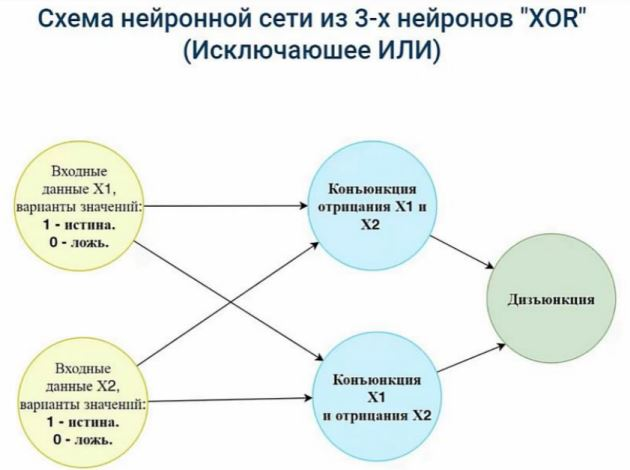

In [ ]:
# w3 - веса для кон !х1 и х2
# w4 - веса для кон x1 и !x2
# w1 - веса для диз

def xor(x):
    res1 = predict(x, w3)
    res2 = predict(x, w4)
    res3 = predict([res1, res2], w1)
    return res3



for x in x_test:
  print(x, xor(x))

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 0
